# Computer Exercise 01 - KDE and Naive Bayes Classifiers ##

### Instructions ###

Included below is the core code for this computer exercise.
You will need to make changes and modifications to perform the experiements and to experiment with other ideas.  Experimenting and exploring other ideas outside of what is suggested is strongly encouraged.

#Use this code as your working environment/playground, and report your results and answers to questions in the Notebook:   xxx_01.

## Part 1:  Kernel Density Estimation



### Load Libraries and Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA

### Load Data ###

 #### Digits Dataset
 Here we load the `digits` dataset, which consists of 1797 images that are 8x8 in size and 16 grayscale levels.  The images as matrices are stored in `images` and the images are stored as vectors in `X`.  The target values are in `y`.

In [2]:
# load the digits dataset
from sklearn.datasets import load_digits
digits = load_digits()
images=digits.images
X=digits.data
y=digits.target

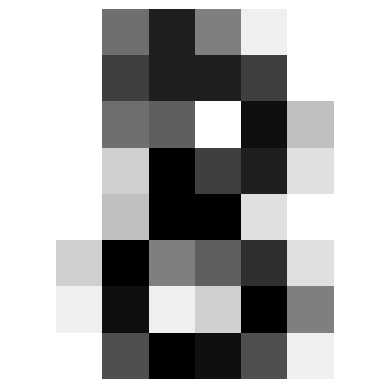

In [3]:
plt.axis('off')
plt.imshow(images[8],cmap='binary')

#### MNIST Dataset
If you prefer to use the MNIST dataset, run the following instructions.
The images will be stored in the numpy array `X` and the target values in `y`.

In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, parser='auto')
# Extract features and labels
X, y = mnist["data"], mnist["target"]
# Convert the DataFrame to a NumPy array
X = X.to_numpy()
y = y.astype(int)

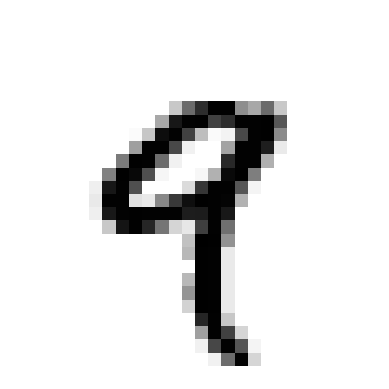

In [5]:
plt.axis('off')
plt.imshow(X[4].reshape(28, 28),cmap='binary')

### Display an array of images

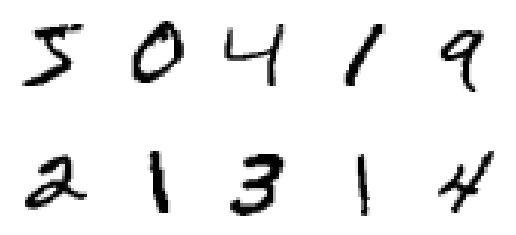

In [6]:
# Plot the first 9 images in the training set
for i in range(10):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='binary')
    plt.axis('off')
plt.show()

## Principal Components Analysis

Perform PCA on the images stored as vectors in `X`.
Note that the number of components must be specified, otherwise there will be no reduction in dimension. 

The first step may be to plot the explained variance.

### Plot the Explained Variance in PCA ##

Here, the explained variance is plotted for all components.  To plot over a smaller range, you may change the first line to `pca=PCA(50)` to plot the first fifty values.

<function matplotlib.pyplot.show(close=None, block=None)>

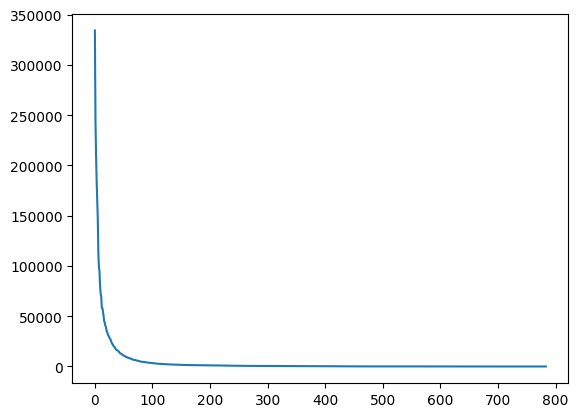

In [7]:
pca = PCA()
data = pca.fit_transform(X)
v = pca.explained_variance_
plt.plot(v)
plt.show

### PCA on Image Dataset

In [8]:
pca = PCA() # Put a number in the parenthesis to set the number of PCA components 
X_pc = pca.fit_transform(X)

## Kernel Density Estimation

Here KDE is used to estimate the probability density function of the data.  

In [9]:
kde = KernelDensity().fit(X_pc)  #Default values are used here.

### Generate New Digits
Here the generative model is used to generate 40 new digits by sampling the estimated density function.

In [10]:
new_data = kde.sample(40)


In [11]:
new_data = pca.inverse_transform(new_data)

### Show some generated digits

Show the generated digits.  

**NOTE:**  It is assumed that there are 40 are generated

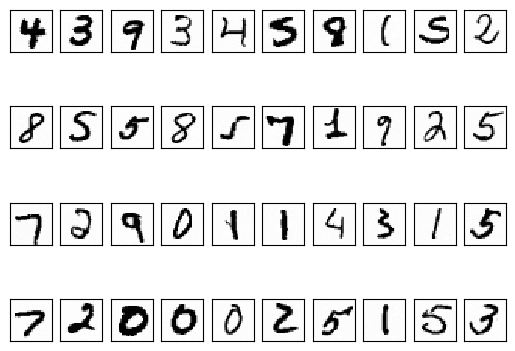

In [12]:
# turn data into a 4x11 grid
new_data = new_data.reshape((4, 10, -1))

# plot resampled digits
fig, ax = plt.subplots(4, 10, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(10):
    for i in range(4):
        im = ax[i, j].imshow(new_data[i, j].reshape((28, 28)),
                    cmap=plt.cm.binary, interpolation='nearest')
plt.show()

## Part 2: Naive Bayes

### The Loan Dataset

In this example, we will be loading Loan Data from DataLab using the pandas 'read_csv` function. 

In [13]:
import pandas as pd

df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Data Exploration

To understand more about the dataset we will use `.info()`.

The dataset consists of 14 columns and 9578 rows.
Apart from “purpose”, columns are either floats or integers. 
Our target column is “not.fully.paid”. 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


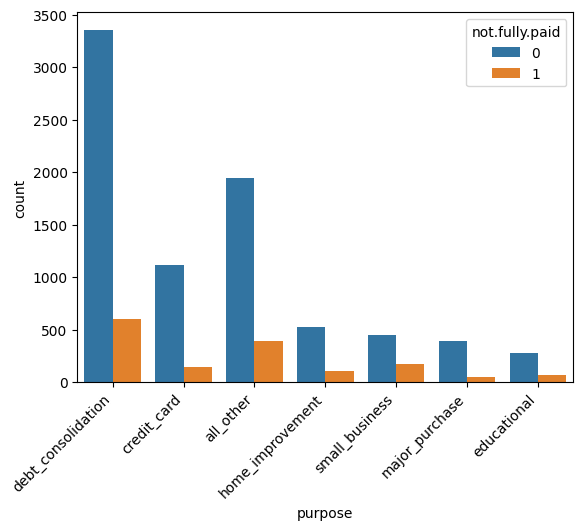

In [15]:
import seaborn as sns

sns.countplot(data=df,x='purpose',hue='not.fully.paid')
plt.xticks(rotation=45, ha='right');

### Data Processing 

We will now convert the ‘purpose’ column from categorical to integer using pandas `get_dummies` function.

In [20]:
from sklearn.model_selection import train_test_split

pre_df = pd.get_dummies(df,columns=['purpose'],drop_first=True)
X = pre_df.drop('not.fully.paid', axis=1)
y = pre_df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=125)


      credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0                 1    0.1189       829.10       11.350407  19.48   737   
1                 1    0.1071       228.22       11.082143  14.29   707   
2                 1    0.1357       366.86       10.373491  11.63   682   
3                 1    0.1008       162.34       11.350407   8.10   712   
4                 1    0.1426       102.92       11.299732  14.97   667   
...             ...       ...          ...             ...    ...   ...   
9573              0    0.1461       344.76       12.180755  10.39   672   
9574              0    0.1253       257.70       11.141862   0.21   722   
9575              0    0.1071        97.81       10.596635  13.09   687   
9576              0    0.1600       351.58       10.819778  19.18   692   
9577              0    0.1392       853.43       11.264464  16.28   732   

      days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0           5639.958

## Model Building and Training

Model building and training is quite simple. We will be training a model on a training dataset using default hyperparameters. 

In [17]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train);

## Model Evaluation


In [18]:
accuracy = clf.score(X_test,y_test)
print("Accuracy = ", accuracy)

Accuracy =  0.8187891440501044


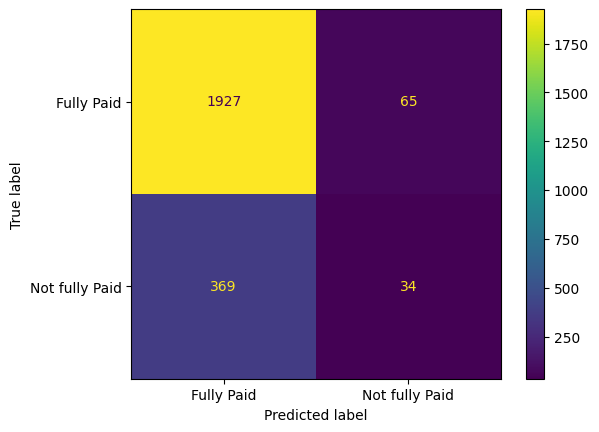

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
labels = ["Fully Paid", "Not fully Paid"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();